In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
dumps = pathlib.Path('/home/daniel/debian_testing_chroot/tmp/lockin_bpsk/')

## AGC

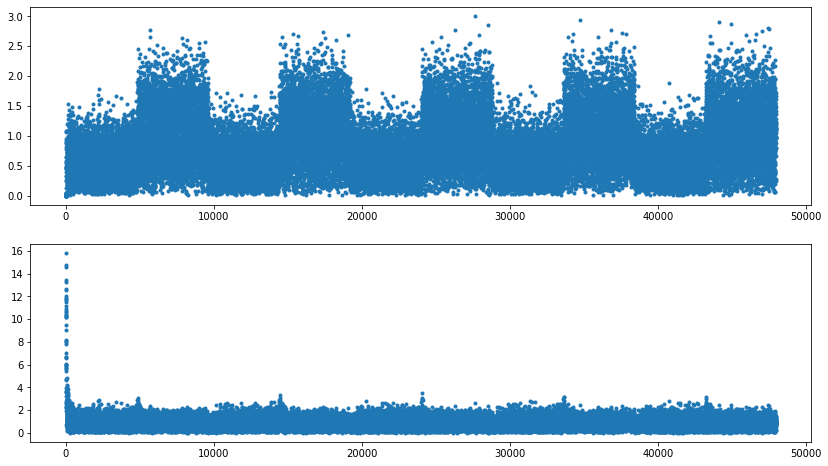

In [3]:
agc_in = np.fromfile(dumps / 'agc_in.c64', dtype = 'complex64')
agc_out = np.fromfile(dumps / 'agc_out.c64', dtype = 'complex64')
fig, axs = plt.subplots(2, figsize = (14,8), facecolor = 'w')
axs[0].plot(np.abs(agc_in), '.')
axs[1].plot(np.abs(agc_out), '.')

## FLL

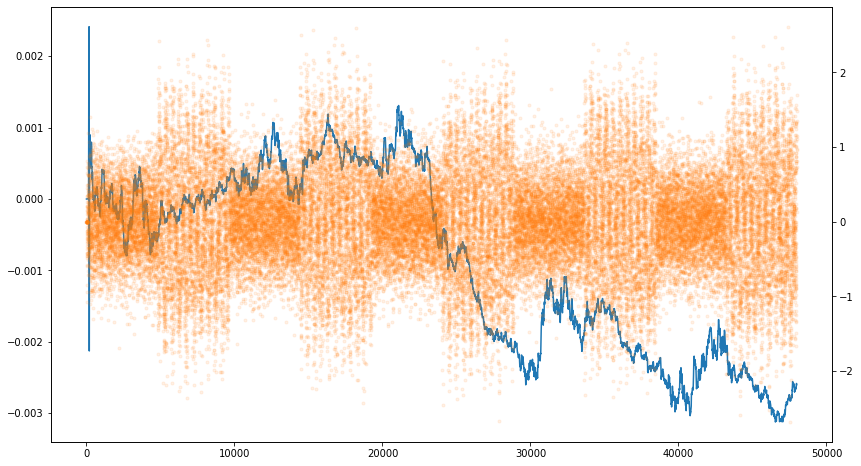

In [4]:
fll_freq = np.fromfile(dumps / 'fll_freq.f32', dtype = 'float32')
fig, ax = plt.subplots(figsize = (14, 8), facecolor = 'w')
ax2 = ax.twinx()
ax2.plot(agc_in.real, '.', color = 'C1', alpha = 0.1)
ax.plot(fll_freq)

## Clock recovery

In [5]:
lock_ins = np.int32(np.arange(0.1, 1, 0.2) * 9600) + 100
lock_span = 100

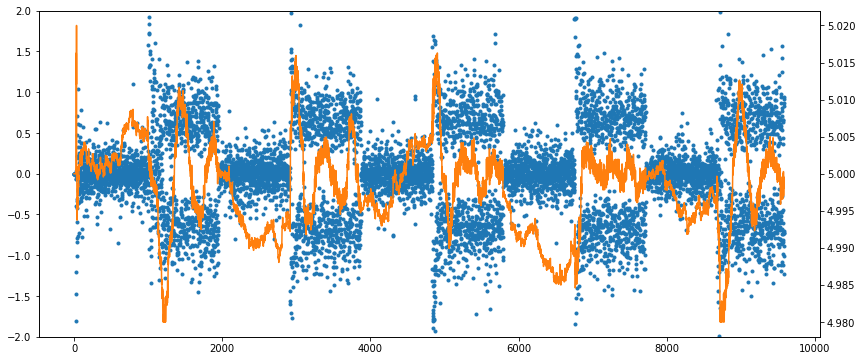

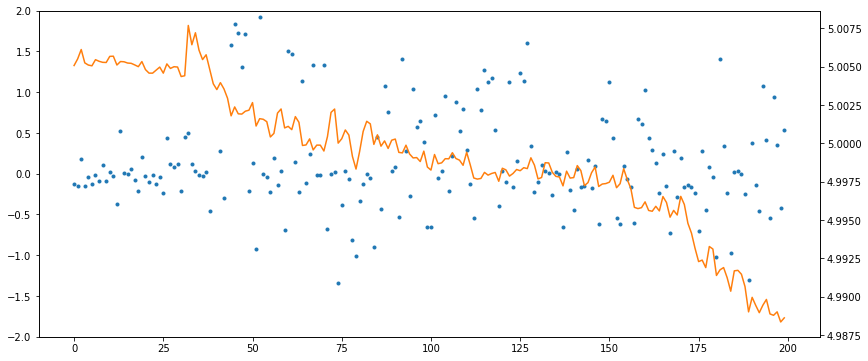

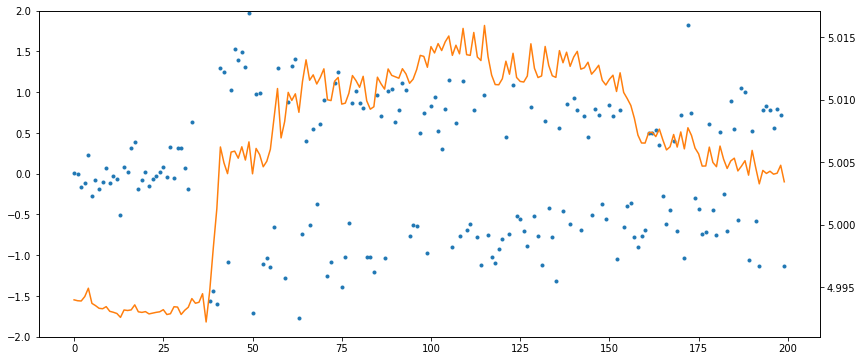

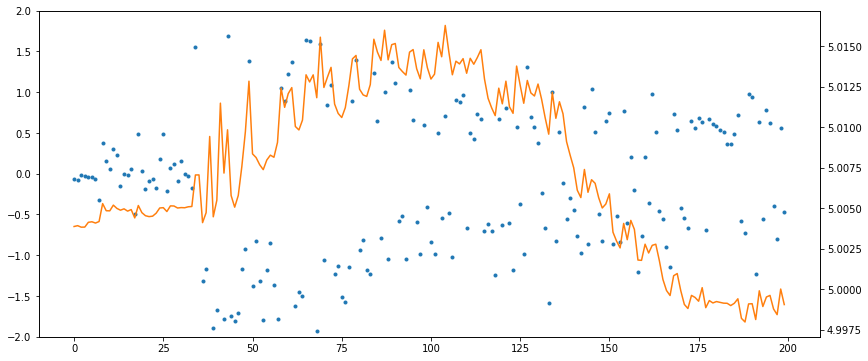

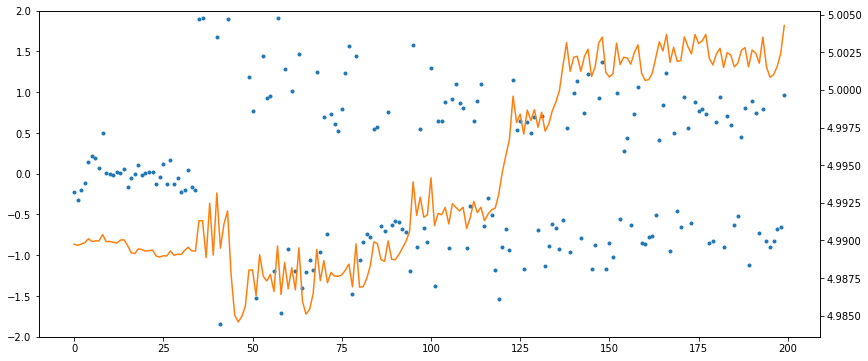

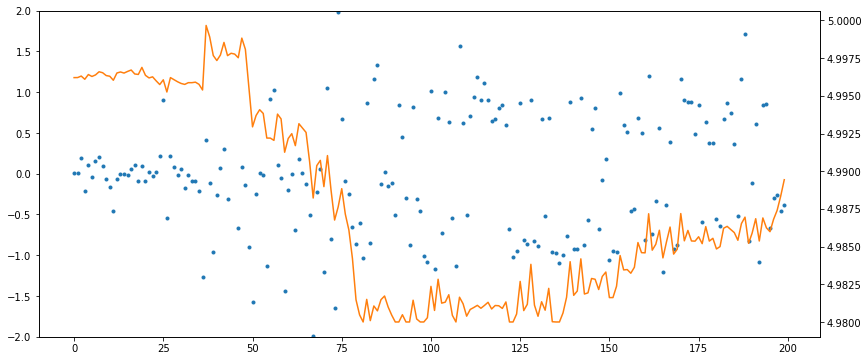

In [6]:
clock_recovery_out = np.fromfile(dumps / 'clock_recovery_out.c64', dtype = 'complex64')
clock_recovery_T_avg = np.fromfile(dumps / 'clock_recovery_T_avg.f32', dtype = 'float32')
fig, ax = plt.subplots(figsize = (14, 6), facecolor = 'w')
ax2 = ax.twinx()
ax2.plot(clock_recovery_T_avg, color = 'C1')
#ax2.set_ylim((4.9,5.1))
ax.plot((clock_recovery_out[1:] * clock_recovery_out[:-1].conj()).real, '.', color = 'C0')
ax.set_ylim((-2, 2))

for lock in lock_ins:
    fig, ax = plt.subplots(figsize = (14, 6), facecolor = 'w')
    ax2 = ax.twinx()
    ax2.plot(clock_recovery_T_avg[lock-lock_span:lock+lock_span], color = 'C1')
    #ax2.set_ylim((4.9,5.1))
    ax.plot((clock_recovery_out[1:] * clock_recovery_out[:-1].conj()).real[lock-lock_span:lock+lock_span], '.', color = 'C0')
    ax.set_ylim((-2, 2))

## Costas

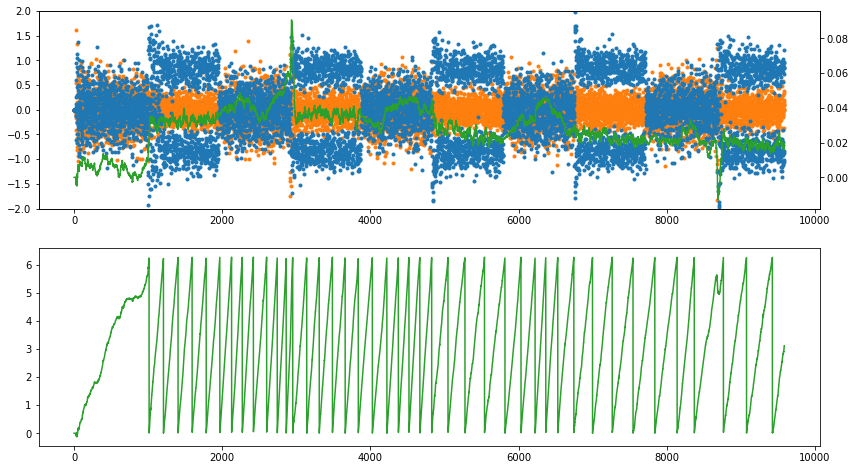

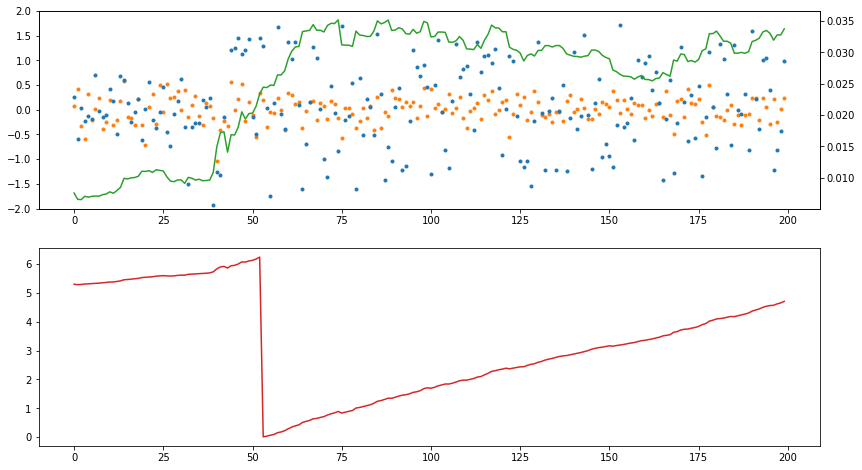

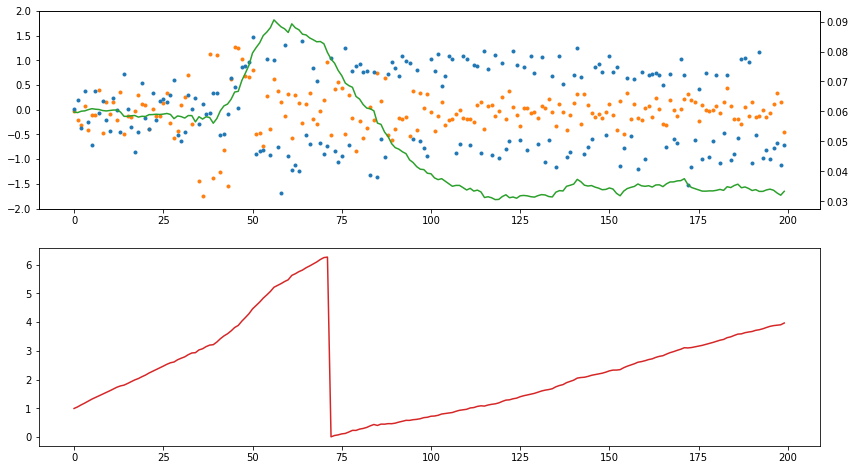

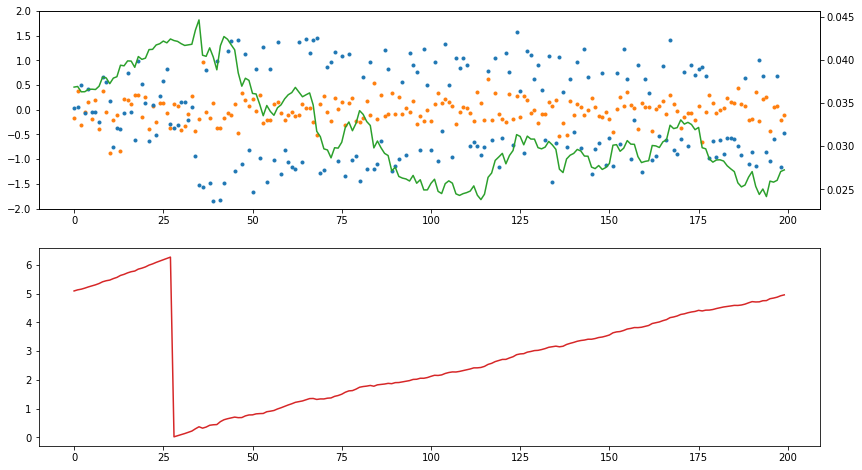

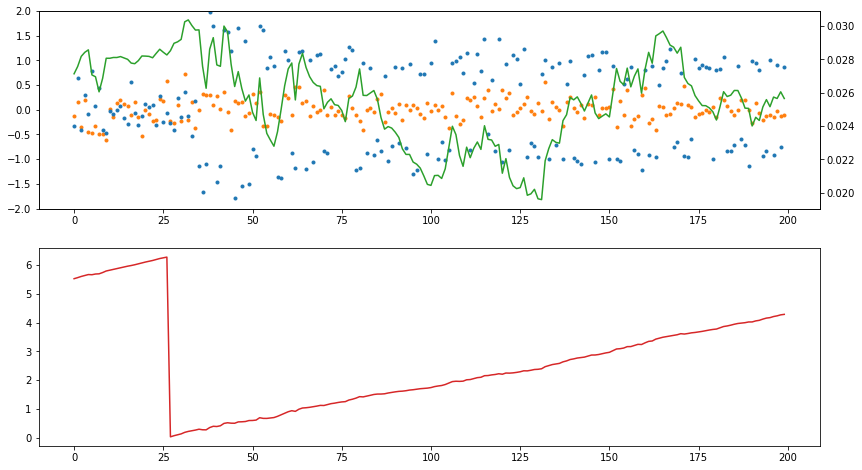

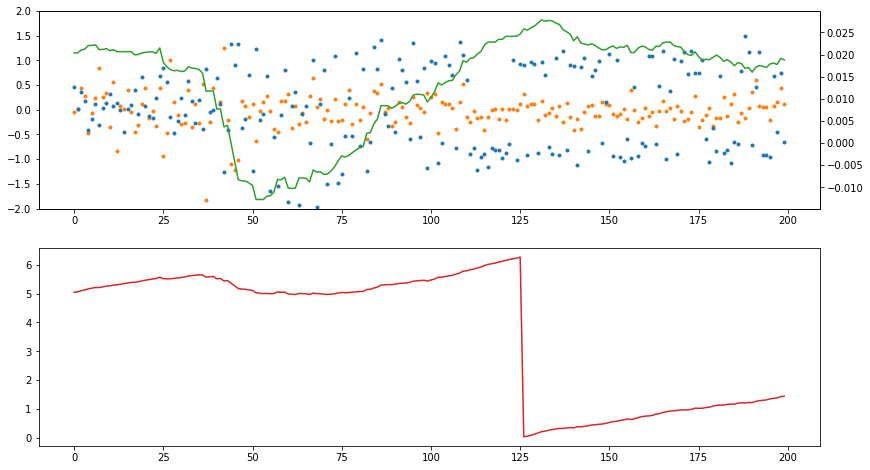

In [7]:
costas_out = np.fromfile(dumps / 'costas_out.c64', dtype = 'complex64')
costas_frequency = np.fromfile(dumps / 'costas_frequency.f32', dtype = 'float32')
costas_phase = np.fromfile(dumps / 'costas_phase.f32', dtype = 'float32')
fig, axs = plt.subplots(2, figsize = (14, 8), facecolor = 'w')
ax2 = axs[0].twinx()
ax2.plot(costas_frequency, color = 'C2')
axs[0].plot(costas_out.imag, '.', color = 'C1')
axs[0].plot(costas_out.real, '.', color = 'C0')
axs[0].set_ylim((-2, 2))
axs[1].plot(costas_phase, color = 'C2')

for lock in lock_ins:
    fig, axs = plt.subplots(2, figsize = (14, 8), facecolor = 'w')
    ax2 = axs[0].twinx()
    ax2.plot(costas_frequency[lock-lock_span:lock+lock_span], color = 'C2')
    axs[0].plot(costas_out.imag[lock-lock_span:lock+lock_span], '.', color = 'C1')
    axs[0].plot(costas_out.real[lock-lock_span:lock+lock_span], '.', color = 'C0')
    axs[0].set_ylim((-2, 2))
    axs[1].plot(costas_phase[lock-lock_span:lock+lock_span], color = 'C3')